In [97]:
import pandas as pd 
harmful_2_df = pd.read_csv('harmful_2_learning.csv')
harmful_2_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word
0,5,madteenies.com,2,10,3,42,7,0.750,big password free login mad madthumb porn porn...
1,15,porntube.com,1,10,4,47,7,0.750,big anal blond fuck babe pussi ass hard hot in...
2,51,mydickdorms.com,1,3,7,173,12,0.575,bareback author dude first last licens mg mode...


In [7]:
print(harmful_2_df.shape)
harmful_2_df.describe()

(500, 9)


,url_id,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000,500.000000
mean,1829.508000,0.802000,5.33400,20.880000,86.030000,20.356,0.323350
std,904.128333,1.405256,4.11781,32.098633,169.843524,30.031,0.292446
min,5.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000
25%,1106.750000,0.000000,2.00000,2.000000,7.000000,4.000,0.075000
50%,2000.000000,0.000000,4.00000,7.000000,31.000000,9.000,0.187500
75%,2583.000000,1.000000,8.00000,23.000000,73.000000,23.000,0.625000
max,3300.000000,5.000000,19.00000,180.000000,1893.000000,225.000,0.950000


In [8]:
value_counts=harmful_2_df['url_harmful_idx'].value_counts()
print(value_counts)

0    310
1    104
2     41
5     37
4      6
3      2
Name: url_harmful_idx, dtype: int64


In [14]:
harmful_2_df.loc[harmful_2_df['harmful_weight'] < 0.5,['url','harmful_word_num','top_word','harmful_weight']].head(3)

,url,harmful_word_num,top_word,harmful_weight
3,wankworld.com,8,categori porn websit video get sex tube also f...,0.200
8,handjobmovies.net,5,handjob link content name trade handjobmovies....,0.125
9,xadultbook.com,6,sex adult facebook free search xadultbook memb...,0.150


In [39]:
harmful_url_dic = {'sex': 1, 'porn': 1, 'gay': 1, 'movi': 1, 'movie': 1, 'tube': 1, 'pornhub':1,
                   'xxx': 1, 'fuck': 1, 'pic': 1, 'dick': 1, 'hot': 1,
                   'anal': 1, 'asian': 1, 'adult': 1, 'shemal': 1, 'cartoon':1,
                   'pictur': 1, 'picture': 1, 'lesbian': 1,

                   'teen': 2, 'big': 2, 'girl': 2, 'pussi': 2, 'ass': 2, 'tit': 2, 'amateur': 2, 'matur': 2, 'boy': 2,
                   'babe': 2, 'cock': 2,'milf': 2, 'sexi': 2, 'black': 2, 'bebe':2,
                   'pic': 2, 'blond': 2, 'nude': 2, 'hairi': 2, 'blowjob': 2, 'cum': 2, 'young': 2,
                   'hardcor': 2, 'hardcore': 2 ,

                   'game': 3, 'casino': 3, 'play': 3, 'onlin': 3,'online':3, 'mobil': 3,  
                   'card': 3,  'race': 3,  'admin': 3,

                   'escort': 4, 'london': 4, 'servic': 4, 'service':4, 'agenc': 4,
                   'galleri': 4,'massag': 4, 'model': 4, 'femal': 4, 'fmale': 4,
                   'vip': 4, 'book': 4, 'uk': 4, 'russian': 4, 'profil': 4,
                   'busti': 4, 'class': 4, 'adult': 4, 'york': 4,
                   
                   'cam':5, 'video':5, 'chat':5, 'webcam': 5,
                   
                   'domain':6, 'domains':6
}

def class_(top20):
    list = top20.split()
    for word in list:
        if word in harmful_url_dic:
            return harmful_url_dic[word]
            break;
    return 0


In [98]:
harmful_2_df['learn_idx'] = harmful_2_df['top_word'].apply(lambda x : class_(x))
harmful_2_df=harmful_2_df[harmful_2_df['img_num'] < 300]
harmful_2_df.head(5)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,learn_idx
0,5,madteenies.com,2,10,3,42,7,0.750,big password free login mad madthumb porn porn...,2
1,15,porntube.com,1,10,4,47,7,0.750,big anal blond fuck babe pussi ass hard hot in...,2
2,51,mydickdorms.com,1,3,7,173,12,0.575,bareback author dude first last licens mg mode...,4
3,61,wankworld.com,0,8,19,181,13,0.200,categori porn websit video get sex tube also f...,1
4,77,videonsex.com,1,0,2,1,3,0.500,sedo domain videonsex.com advertis ani associ ...,6


In [26]:
import sklearn
print(sklearn.__version__)

0.18.1


In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
columns = ['url','img_num','child_num','harmful_weight','learn_idx']

harmDF = pd.DataFrame(harmful_2_df, columns=columns)
harmDF.head(3)

,url,img_num,child_num,harmful_weight,learn_idx
0,madteenies.com,42,7,0.750,2
1,porntube.com,47,7,0.750,2
2,mydickdorms.com,173,12,0.575,4


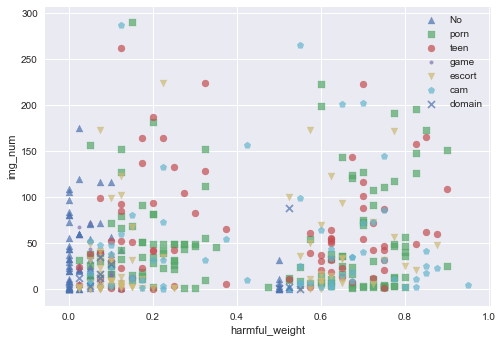

In [105]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o','.','v','p','x']
labels=['No','porn','teen','game','escort','cam','domain']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = harmDF[harmDF['learn_idx']==i]['harmful_weight']
    y_axis_data = harmDF[harmDF['learn_idx']==i]['img_num']
   # area=harmDF['child_num']*2
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i],alpha=0.7)


plt.legend()
plt.xlabel('harmful_weight')
plt.ylabel('img_num')
plt.show()

In [104]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

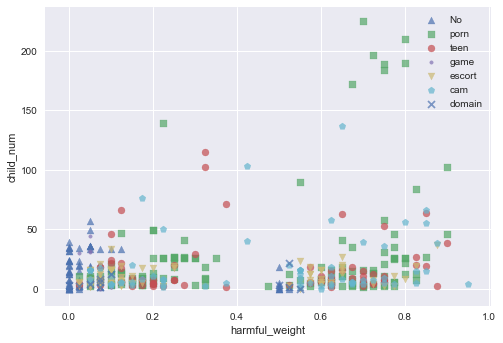

In [107]:

for i, marker in enumerate(markers):
    x_axis_data = harmDF[harmDF['learn_idx']==i]['harmful_weight']
    y_axis_data = harmDF[harmDF['learn_idx']==i]['child_num']
   # area=harmDF['child_num']*2
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i],alpha=0.7)


plt.legend()
plt.xlabel('harmful_weight')
plt.ylabel('child_num')
plt.show()

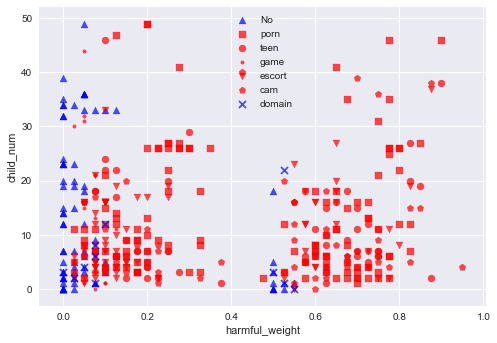

In [112]:
markers=['^', 's', 'o','.','v','p','x']
labels=['No','porn','teen','game','escort','cam','domain']
colors=['blue','red','red','red','red','red','blue']

for i, marker in enumerate(markers):
    x_axis_data = harmDF[harmDF['learn_idx']==i]['harmful_weight']
    y_axis_data = harmDF[harmDF['learn_idx']==i]['child_num']
   # area=harmDF['child_num']*2
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=labels[i],alpha=0.7, c=colors[i])


plt.legend()
plt.xlabel('harmful_weight')
plt.ylabel('child_num')
plt.show()